In [65]:
import pandas as pd
import numpy as np

In [66]:
np.random.seed(42)

In [67]:
data = pd.read_excel('Demand_Supply.xlsx')

In [68]:
data.columns

Index(['Hour', 'Avg_Power', 'Min_hh_demand', 'Max_hh_demand', 'Avg_hh_demand',
       'Min_dd', 'Max_dd', 'Avg_dd'],
      dtype='object')

In [69]:
data

,Hour,Avg_Power,Min_hh_demand,Max_hh_demand,Avg_hh_demand,Min_dd,Max_dd,Avg_dd
0,1,12.83,0.011102,0.014835,0.013399,1.731989,2.314243,2.090184
1,2,11.03,0.010830,0.014130,0.012524,1.689420,2.204303,1.953702
2,3,9.54,0.010983,0.012746,0.011782,1.713343,1.988306,1.837922
3,4,8.57,0.013484,0.015639,0.014353,2.103440,2.439722,2.238993
4,5,8.35,0.014765,0.021185,0.017456,2.303382,3.304917,2.723140
5,6,8.53,0.019558,0.026088,0.022991,3.051051,4.069734,3.586628
6,7,9.77,0.016044,0.045760,0.028563,2.502833,7.138555,4.455800
7,8,9.48,0.037581,0.053780,0.045229,5.862669,8.389696,7.055727
8,9,16.17,0.047514,0.107262,0.077150,7.412261,16.732840,12.035431
9,10,14.58,0.052392,0.094908,0.070847,8.173202,14.805663,11.052154


## Creating Synthetic Data by adding noise to the original dataset

In [70]:
# Define the number of households and the noise threshold
n_households = 156
noise_threshold = 0.12

# Initialize the simulated data
simulated_data = pd.DataFrame(index=range(n_households * len(data)), columns=data.columns)

# Simulate the demand curves for each household
for i in range(n_households):
    # Generate random noise

    random_noise = np.random.uniform(-noise_threshold, noise_threshold, size=len(data))

    print(random_noise)

    # Add the random noise to the original data
    simulated_hour = data['Hour'].values
    simulated_avg_power = data['Avg_Power'].values + data['Avg_Power'].values * random_noise
    simulated_min_hh_demand = data['Min_hh_demand'].values + data['Min_hh_demand'].values * random_noise
    simulated_max_hh_demand = data['Max_hh_demand'].values + data['Max_hh_demand'].values * random_noise
    simulated_avg_hh_demand = data['Avg_hh_demand'].values + data['Avg_hh_demand'].values * random_noise
    simulated_min_dd = data['Min_dd'].values + data['Min_dd'].values * random_noise
    simulated_max_dd = data['Max_dd'].values + data['Max_dd'].values * random_noise
    simulated_avg_dd = data['Avg_dd'].values + data['Avg_dd'].values * random_noise

    # Store the simulated data
    simulated_data.iloc[i * len(data): (i + 1) * len(data)] = np.array([simulated_hour, simulated_avg_power, simulated_min_hh_demand, simulated_max_hh_demand, simulated_avg_hh_demand, simulated_min_dd, simulated_max_dd, simulated_avg_dd]).T

# Save the simulated data to a CSV file
simulated_data

[-0.03011037  0.10817143  0.05567855  0.02367804 -0.08255553 -0.08256132
 -0.10605993  0.08788227  0.0242676   0.04993742 -0.11505972  0.11277836
  0.07978623 -0.06903861 -0.07636201 -0.07598292 -0.04698186  0.00594154
 -0.0163332  -0.05010501  0.02684469 -0.08652147 -0.04988528 -0.03207316]
[-0.0105432   0.06844223 -0.07207829  0.00341627  0.0221795  -0.1088519
  0.02581076 -0.07907421 -0.10438762  0.10773253  0.11175169  0.07401536
 -0.0468927  -0.09655869  0.04421593 -0.0143634  -0.09071082 -0.00115754
 -0.11174675  0.0982369  -0.0578928   0.03900535 -0.04518934  0.00481633]
[ 0.01121047 -0.07563493  0.11270031  0.06603188  0.10547975  0.09475856
  0.02349599  0.10124982 -0.0987618  -0.07296411 -0.10914545 -0.04192072
 -0.02671745 -0.05487623  0.078897   -0.0343792  -0.05257572  0.01024706
 -0.08617819  0.07252728 -0.10210785  0.11685286  0.06533874 -0.07230824]
[-0.11867469  0.07571074  0.04964576  0.05496172  0.06510488 -0.10222928
 -0.03396823 -0.09219143  0.08714482  0.02959155 

,Hour,Avg_Power,Min_hh_demand,Max_hh_demand,Avg_hh_demand,Min_dd,Max_dd,Avg_dd
0,1.0,12.443684,0.010768,0.014388,0.012995,1.679838,2.244561,2.027248
1,2.0,12.223131,0.012001,0.015659,0.013878,1.872167,2.442746,2.165036
2,3.0,10.071173,0.011594,0.013455,0.012438,1.80874,2.099012,1.940254
3,4.0,8.772921,0.013803,0.01601,0.014692,2.153245,2.49749,2.292008
4,5.0,7.660661,0.013546,0.019436,0.016015,2.113225,3.032078,2.49833
...,...,...,...,...,...,...,...,...
3739,20.0,24.866317,0.030965,0.066894,0.050497,4.830532,10.435483,7.877523
3740,21.0,33.646411,0.032622,0.043049,0.038406,5.089091,6.715677,5.991277
3741,22.0,29.551845,0.022453,0.031546,0.027552,3.502637,4.92125,4.298189
3742,23.0,22.645881,0.018047,0.0193,0.018722,2.815298,3.010787,2.92064


## Extracting "Average_hh_demand" from the synthetic data

In [71]:
avg_hh_demand = simulated_data[['Hour', 'Avg_hh_demand']]

avg_hh_demand.to_excel('avg_hh_demand.xlsx', index=False)

avg_hh_demand

,Hour,Avg_hh_demand
0,1.0,0.012995
1,2.0,0.013878
2,3.0,0.012438
3,4.0,0.014692
4,5.0,0.016015
...,...,...
3739,20.0,0.050497
3740,21.0,0.038406
3741,22.0,0.027552
3742,23.0,0.018722


In [72]:
reshaped_avg_hh_demand = pd.DataFrame(np.reshape(avg_hh_demand['Avg_hh_demand'].values, (n_households, 24)),
                            columns=[f'avg_hh_dd_hour_{i+1}' for i in range(24)])

In [73]:
reshaped_avg_hh_demand

,avg_hh_dd_hour_1,avg_hh_dd_hour_2,avg_hh_dd_hour_3,avg_hh_dd_hour_4,avg_hh_dd_hour_5,avg_hh_dd_hour_6,avg_hh_dd_hour_7,avg_hh_dd_hour_8,avg_hh_dd_hour_9,avg_hh_dd_hour_10,...,avg_hh_dd_hour_15,avg_hh_dd_hour_16,avg_hh_dd_hour_17,avg_hh_dd_hour_18,avg_hh_dd_hour_19,avg_hh_dd_hour_20,avg_hh_dd_hour_21,avg_hh_dd_hour_22,avg_hh_dd_hour_23,avg_hh_dd_hour_24
0,0.012995,0.013878,0.012438,0.014692,0.016015,0.021093,0.025533,0.049204,0.079022,0.074385,...,0.056309,0.06231,0.052553,0.070859,0.067111,0.047087,0.035948,0.023387,0.016754,0.015169
1,0.013257,0.013381,0.010932,0.014402,0.017843,0.020489,0.0293,0.041653,0.069097,0.07848,...,0.06366,0.066466,0.050142,0.070359,0.060601,0.05444,0.032981,0.026601,0.016837,0.015747
2,0.013549,0.011576,0.013109,0.0153,0.019297,0.02517,0.029234,0.049808,0.069531,0.065678,...,0.065774,0.065116,0.052245,0.071162,0.062346,0.053165,0.031434,0.028594,0.018786,0.014538
3,0.011809,0.013472,0.012366,0.015141,0.018592,0.020641,0.027593,0.041059,0.083873,0.072944,...,0.064323,0.069661,0.060269,0.069971,0.061996,0.052107,0.037199,0.025979,0.018781,0.015648
4,0.013472,0.012306,0.01044,0.013002,0.015493,0.023744,0.02729,0.045322,0.084697,0.066584,...,0.057888,0.061951,0.060831,0.07565,0.07041,0.053989,0.03756,0.023676,0.019296,0.015819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.012594,0.011812,0.01037,0.015629,0.018682,0.023694,0.030278,0.041452,0.076379,0.068317,...,0.057913,0.062701,0.051678,0.077345,0.067702,0.049169,0.037198,0.023479,0.01758,0.015408
152,0.01371,0.014025,0.012543,0.014001,0.018828,0.021174,0.025344,0.042021,0.074195,0.071027,...,0.054383,0.059907,0.055821,0.069395,0.073779,0.045533,0.031017,0.025289,0.016523,0.013977
153,0.014121,0.011356,0.012088,0.013598,0.016088,0.022328,0.030629,0.044058,0.081793,0.064479,...,0.067243,0.065611,0.049402,0.062311,0.073577,0.049865,0.037321,0.02397,0.016979,0.013904
154,0.014883,0.013028,0.013006,0.013545,0.017923,0.023976,0.027312,0.049008,0.08543,0.077391,...,0.053799,0.070931,0.057873,0.072515,0.07625,0.047332,0.033664,0.023015,0.017392,0.014773


In [74]:
reshaped_avg_hh_demand.to_excel("avg_hh_demand_reformatted.xlsx", index=False)

## Plotting a graph for avg_hh_demand per hour for each household.

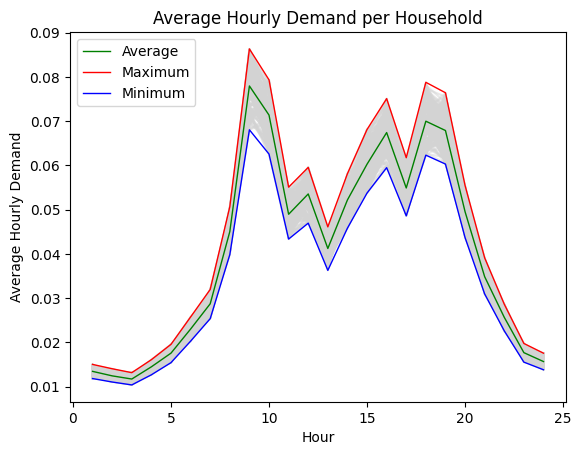

In [75]:
import matplotlib.pyplot as plt

# Calculate the mean of household values
mean_demand = reshaped_avg_hh_demand.mean(axis=0)
max_demand = reshaped_avg_hh_demand.max(axis=0)
min_demand = reshaped_avg_hh_demand.min(axis=0)

fig, ax = plt.subplots()

# Plot the average hourly demand for each household
for i, household in reshaped_avg_hh_demand.iterrows():
    ax.plot(range(1, 25), household.values, color='lightgray', alpha=0.5)


# Plot the mean with a very thick line
ax.plot(range(1, 25), mean_demand, color='green', linewidth=1, label='Average')
ax.plot(range(1, 25), max_demand, color='red', linewidth=1, label='Maximum')
ax.plot(range(1, 25), min_demand, color='blue', linewidth=1, label='Minimum')

# Set the axis labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Average Hourly Demand')
ax.set_title('Average Hourly Demand per Household')

# Add a legend
ax.legend()

# save
plt.savefig('avg_hh_demand_per_household.png')

# Show the plot
plt.show()

## Extracting "Min_hh_demand" from the synthetic data

In [76]:
min_hh_demand = simulated_data[['Hour', 'Min_hh_demand']]


min_hh_demand.to_excel('min_hh_demand.xlsx', index=False)

min_hh_demand

,Hour,Min_hh_demand
0,1.0,0.010768
1,2.0,0.012001
2,3.0,0.011594
3,4.0,0.013803
4,5.0,0.013546
...,...,...
3739,20.0,0.030965
3740,21.0,0.032622
3741,22.0,0.022453
3742,23.0,0.018047


In [77]:
reshaped_min_hh_demand = pd.DataFrame(np.reshape(min_hh_demand['Min_hh_demand'].values, (n_households, 24)),
                            columns=[f'min_hh_dd_hour_{i+1}' for i in range(24)])

In [78]:
reshaped_min_hh_demand

,min_hh_dd_hour_1,min_hh_dd_hour_2,min_hh_dd_hour_3,min_hh_dd_hour_4,min_hh_dd_hour_5,min_hh_dd_hour_6,min_hh_dd_hour_7,min_hh_dd_hour_8,min_hh_dd_hour_9,min_hh_dd_hour_10,...,min_hh_dd_hour_15,min_hh_dd_hour_16,min_hh_dd_hour_17,min_hh_dd_hour_18,min_hh_dd_hour_19,min_hh_dd_hour_20,min_hh_dd_hour_21,min_hh_dd_hour_22,min_hh_dd_hour_23,min_hh_dd_hour_24
0,0.010768,0.012001,0.011594,0.013803,0.013546,0.017943,0.014342,0.040884,0.048668,0.055009,...,0.04708,0.051639,0.047077,0.065729,0.054787,0.028874,0.030535,0.019058,0.01615,0.013042
1,0.010985,0.011571,0.010191,0.01353,0.015093,0.017429,0.016458,0.03461,0.042555,0.058037,...,0.053226,0.055082,0.044917,0.065265,0.049473,0.033383,0.028015,0.021677,0.01623,0.013539
2,0.011227,0.010011,0.012221,0.014374,0.016323,0.021411,0.016421,0.041386,0.042822,0.04857,...,0.054994,0.053964,0.046801,0.066011,0.050897,0.032601,0.0267,0.023301,0.018109,0.0125
3,0.009785,0.01165,0.011528,0.014225,0.015727,0.017559,0.015499,0.034117,0.051655,0.053943,...,0.053781,0.05773,0.053989,0.064905,0.050612,0.031952,0.031598,0.02117,0.018104,0.013454
4,0.011163,0.010641,0.009732,0.012215,0.013105,0.020198,0.015329,0.037659,0.052162,0.04924,...,0.0484,0.051341,0.054493,0.070173,0.05748,0.033107,0.031904,0.019294,0.0186,0.013601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.010435,0.010214,0.009667,0.014683,0.015802,0.020156,0.017007,0.034443,0.047039,0.050522,...,0.048421,0.051963,0.046294,0.071746,0.05527,0.030151,0.031596,0.019133,0.016946,0.013248
152,0.011361,0.012128,0.011693,0.013153,0.015926,0.018012,0.014236,0.034915,0.045695,0.052525,...,0.04547,0.049647,0.050005,0.064372,0.060231,0.027921,0.026346,0.020608,0.015927,0.012018
153,0.011701,0.00982,0.011268,0.012775,0.013608,0.018994,0.017205,0.036608,0.050374,0.047683,...,0.056222,0.054374,0.044255,0.057801,0.060066,0.030577,0.031701,0.019534,0.016366,0.011955
154,0.012332,0.011266,0.012125,0.012725,0.01516,0.020396,0.015341,0.040721,0.052614,0.057232,...,0.044981,0.058783,0.051843,0.067265,0.062249,0.029024,0.028594,0.018755,0.016765,0.012702


In [79]:
reshaped_min_hh_demand.to_excel("min_hh_demand_reformatted.xlsx", index=False)

## Plotting a graph for min_hh_demand per hour for each household

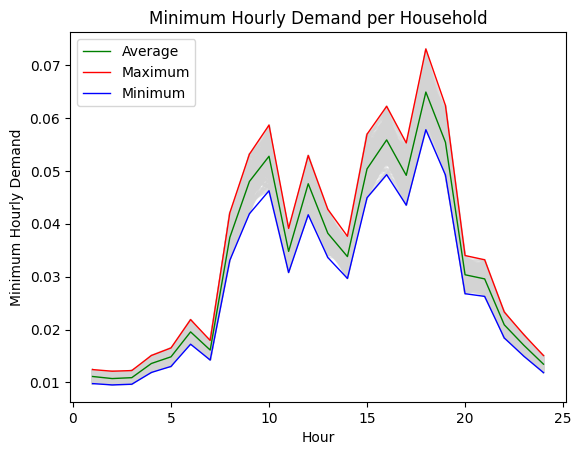

In [80]:
import matplotlib.pyplot as plt
# Calculate the mean of household values
# Calculate the mean of household values
mean_demand = reshaped_min_hh_demand.mean(axis=0)
max_demand = reshaped_min_hh_demand.max(axis=0)
min_demand = reshaped_min_hh_demand.min(axis=0)

fig, ax = plt.subplots()

# Plot the average hourly demand for each household
for i, household in reshaped_min_hh_demand.iterrows():
    ax.plot(range(1, 25), household.values, color='lightgray', alpha=0.5)


# Plot the mean with a very thick line
ax.plot(range(1, 25), mean_demand, color='green', linewidth=1, label='Average')
ax.plot(range(1, 25), max_demand, color='red', linewidth=1, label='Maximum')
ax.plot(range(1, 25), min_demand, color='blue', linewidth=1, label='Minimum')

# Set the axis labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Minimum Hourly Demand')
ax.set_title('Minimum Hourly Demand per Household')

# legend
ax.legend()

# save
plt.savefig('min_hh_demand_per_household.png')

# Show the plot
plt.show()

In [81]:
max_hh_demand = simulated_data[['Hour', 'Max_hh_demand']]


max_hh_demand.to_excel('max_hh_demand.xlsx', index=False)

min_hh_demand

,Hour,Min_hh_demand
0,1.0,0.010768
1,2.0,0.012001
2,3.0,0.011594
3,4.0,0.013803
4,5.0,0.013546
...,...,...
3739,20.0,0.030965
3740,21.0,0.032622
3741,22.0,0.022453
3742,23.0,0.018047


In [82]:
reshaped_max_hh_demand = pd.DataFrame(np.reshape(max_hh_demand['Max_hh_demand'].values, (n_households, 24)),
                            columns=[f'max_hh_dd_hour_{i+1}' for i in range(24)])

In [83]:
reshaped_max_hh_demand

,max_hh_dd_hour_1,max_hh_dd_hour_2,max_hh_dd_hour_3,max_hh_dd_hour_4,max_hh_dd_hour_5,max_hh_dd_hour_6,max_hh_dd_hour_7,max_hh_dd_hour_8,max_hh_dd_hour_9,max_hh_dd_hour_10,...,max_hh_dd_hour_15,max_hh_dd_hour_16,max_hh_dd_hour_17,max_hh_dd_hour_18,max_hh_dd_hour_19,max_hh_dd_hour_20,max_hh_dd_hour_21,max_hh_dd_hour_22,max_hh_dd_hour_23,max_hh_dd_hour_24
0,0.014388,0.015659,0.013455,0.01601,0.019436,0.023934,0.040907,0.058506,0.109865,0.099648,...,0.065162,0.07361,0.057419,0.074799,0.081399,0.062376,0.040294,0.026777,0.017272,0.017681
1,0.014678,0.015097,0.011827,0.015693,0.021655,0.023248,0.046941,0.049527,0.096065,0.105133,...,0.073669,0.078519,0.054785,0.074271,0.073504,0.072117,0.036969,0.030457,0.017357,0.018355
2,0.015001,0.013061,0.014182,0.016672,0.02342,0.02856,0.046835,0.059225,0.096668,0.087983,...,0.076116,0.076924,0.057082,0.075119,0.07562,0.070429,0.035234,0.032739,0.019366,0.016946
3,0.013074,0.0152,0.013378,0.016499,0.022565,0.023421,0.044206,0.048822,0.116609,0.097717,...,0.074437,0.082293,0.065849,0.073861,0.075196,0.069027,0.041697,0.029745,0.019361,0.018239
4,0.014916,0.013884,0.011294,0.014167,0.018803,0.026942,0.043721,0.053891,0.117754,0.089197,...,0.06699,0.073186,0.066463,0.079856,0.0854,0.071521,0.042101,0.027108,0.019891,0.018439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.013944,0.013327,0.011218,0.017031,0.022673,0.026885,0.048508,0.049289,0.106189,0.091519,...,0.067019,0.074072,0.056464,0.081646,0.082117,0.065135,0.041695,0.026883,0.018123,0.01796
152,0.01518,0.015824,0.01357,0.015256,0.022851,0.024026,0.040603,0.049965,0.103154,0.095149,...,0.062934,0.070771,0.06099,0.073254,0.089487,0.060319,0.034767,0.028955,0.017033,0.016292
153,0.015635,0.012813,0.013077,0.014817,0.019525,0.025335,0.049071,0.052387,0.113717,0.086377,...,0.077816,0.077509,0.053977,0.065776,0.089243,0.066056,0.041833,0.027445,0.017503,0.016207
154,0.016478,0.014699,0.014071,0.014759,0.021752,0.027206,0.043756,0.058273,0.118773,0.103674,...,0.062258,0.083794,0.063232,0.076547,0.092485,0.062702,0.037734,0.026351,0.017929,0.017219


In [84]:
reshaped_max_hh_demand.to_excel("max_hh_demand_reformatted.xlsx", index=False)

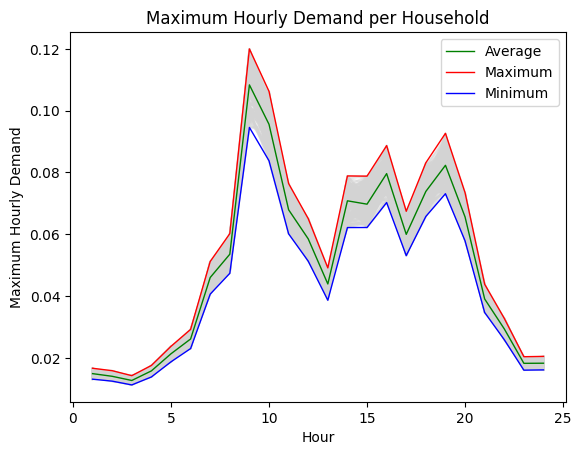

In [85]:
import matplotlib.pyplot as plt

# Calculate the mean of household values
# Calculate the mean of household values
mean_demand = reshaped_max_hh_demand.mean(axis=0)
max_demand = reshaped_max_hh_demand.max(axis=0)
min_demand = reshaped_max_hh_demand.min(axis=0)

fig, ax = plt.subplots()

# Plot the average hourly demand for each household
for i, household in reshaped_max_hh_demand.iterrows():
    ax.plot(range(1, 25), household.values, color='lightgray', alpha=0.5)


# Plot the mean with a very thick line
ax.plot(range(1, 25), mean_demand, color='green', linewidth=1, label='Average')
ax.plot(range(1, 25), max_demand, color='red', linewidth=1, label='Maximum')
ax.plot(range(1, 25), min_demand, color='blue', linewidth=1, label='Minimum')

# Set the axis labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Maximum Hourly Demand')
ax.set_title('Maximum Hourly Demand per Household')

# Legend
ax.legend()

# Save the plot
plt.savefig('max_hh_demand_per_household.png')

# Show the plot
plt.show()